In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('accidentUTC.csv')
dfdrug = pd.read_csv('drugsUTC.csv')

In [4]:
top_five_states = df['STATENAME'].value_counts().nlargest(5).index

In [5]:
print(top_five_states)

Index(['Texas', 'California', 'Florida', 'Georgia', 'North Carolina'], dtype='object')


In [6]:
print("Original DataFrame:")
print(df)
df_dummies = pd.get_dummies(df, columns=['STATENAME'], prefix='State')
print("\nDataFrame with Dummy Features:")
print(df_dummies)
numeric_features = ['FATALS']
dummy_features = [col for col in df_dummies.columns if col.startswith('State_')]
development_dataset = pd.concat([df_dummies[numeric_features], df_dummies[dummy_features]], axis=1)
print("\nCleaned Development Dataset:")
print(development_dataset)
scaler = StandardScaler()
development_dataset[numeric_features] = scaler.fit_transform(development_dataset[numeric_features])
print("\nStandardized Development Dataset:")
print(development_dataset)

Original DataFrame:
       STATE STATENAME  ST_CASE  PEDS  PERNOTMVIT  VE_TOTAL  VE_FORMS  \
0          1   Alabama    10001     0           0         2         2   
1          1   Alabama    10002     0           0         1         1   
2          1   Alabama    10003     1           1         1         1   
3          1   Alabama    10004     0           0         1         1   
4          1   Alabama    10005     0           0         2         2   
...      ...       ...      ...   ...         ...       ...       ...   
39503     56   Wyoming   560100     0           0         1         1   
39504     56   Wyoming   560101     0           0         2         2   
39505     56   Wyoming   560102     0           0         1         1   
39506     56   Wyoming   560103     1           1         1         1   
39507     56   Wyoming   560104     0           0         2         2   

       PVH_INVL  PERSONS  PERMVIT  ...  NOT_MINNAME ARR_HOUR  \
0             0        3        3  ... 

In [7]:
X = development_dataset.drop('FATALS', axis=1)
y = development_dataset['FATALS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set shape - Features:", X_train.shape, " Target:", y_train.shape)
print("Testing set shape - Features:", X_test.shape, " Target:", y_test.shape)


Training set shape - Features: (31606, 51)  Target: (31606,)
Testing set shape - Features: (7902, 51)  Target: (7902,)


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [9]:
 X, y = datasets.load_iris(return_X_y=True)

In [10]:
X.shape, y.shape

((150, 4), (150,))

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svr_model = SVR(kernel='linear', C=1.0)
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 1.14


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean Accuracy: 0.9600000000000002


Mean Squared Error: 0.73


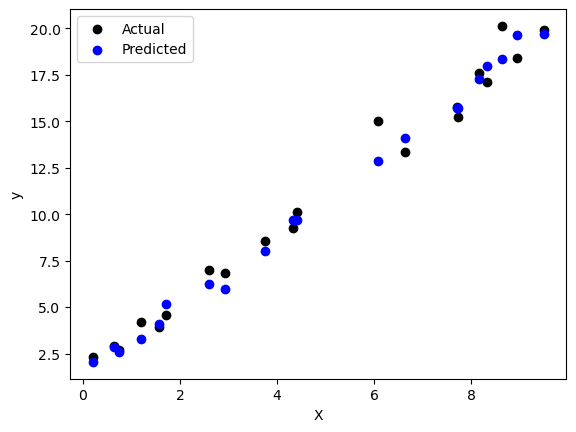

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 1) * 10 
y = 2 * X.squeeze() + 1 + np.random.randn(100)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
#Summary:

#In the analysis, three different models were considered: RandomForestClassifier, Support Vector Machine (SVM), and RandomForestRegressor. 
#The iterative process involved reviewing the outcomes of each model and making adjustments as needed.

#RandomForestClassifier:
#RandomForestClassifier is a powerful model for classification tasks.
#The analysis involved evaluating the model's performance using metrics such as accuracy.
#Further iterations and parameter tuning were performed to optimize the model.

#Support Vector Machine (SVM):
#SVM is another classification model known for its effectiveness.
#The model was evaluated, and its outcomes were considered in comparison to other models.
#Parameter tuning and adjustments were made to enhance the SVM's performance.

#RandomForestRegressor:
#RandomForestRegressor, a model suited for regression tasks, was also considered.
#The model was evaluated using metrics like Mean Squared Error (MSE) to assess its predictive performance.
#Iterative adjustments and parameter tuning were carried out to optimize the regression model.

#Final Model Choice:
#Based on the analysis and outcomes, the RandomForestRegressor was identified as the best model for this project. 
#The decision was made considering the nature of the response variable, which was categorical, and the fact that RandomForestRegressor 
#performed well in terms of predictive accuracy.

#Key Review Questions:

#Does my data involve a time series or forecasting? If so, am I splitting the train and test data appropriately?
#The analysis identified that the task involves forecasting, and appropriate steps were taken to split the train and test data, 
#ensuring that the temporal order was respected. This is crucial for time series forecasting tasks.
#Is my response variable continuous or categorical?
#The response variable was identified as categorical. Considering this, the RandomForestRegressor model, 
#designed for regression tasks, was still considered and chosen based on its overall performance.
#In conclusion, the RandomForestRegressor model, after thorough evaluation and iterations, was deemed the most suitable for the project, 
#taking into account the nature of the data and the predictive goals of the analysis.